# Arbeidskrav 4 

## **Innledning**
Dette prosjektet analyserer forskjellen mellom den påståtte rekkevidden (WLTP) og den faktiske rekkevidden (STOPP) for elbiler testet av Motor/NAF.

Vi henter dataen fra en nettside, vasker og renser den, og gjennomfører en lineær regresjonsanalyse for å undersøke sammenhengen mellom WLTP og STOPP.

## **Metode**
1. **Nettskraping**: Dataen hentes fra Motor.no.
2. **Datavask**: Utrensing av irrelevant data og omstrukturering av kolonner.
3. **Analyse**:
   - Beregning av avvik mellom påstått og faktisk rekkevidde.
   - Bygging av en lineær regresjonsmodell.
   - Visualisering av funnene.

## **Resultater**
Som vi kan se i grafen har regresjonlinjen et stigningstall på cirka 0.86, dette vil si at grafen for hver påståtte kilomter bilen skal kunne kjøre(WLTP). Klarer bilene i realiteten å kjøre 0.86 for hver(STOPP). Dette blir også gjennspeilet i regresjonmodellen og grafene som viser en ganske synlig forskjell i mellom variablene. Disse funne samsvarer også greit med Avik som varierer fra 11% til 28% mellom bilene, dette er også synlig utifra punktene i grafen. Som viser at noen biler lever opp til påstandende sine bedre enn andre, men er likevel er det ingen biler utfyller dem helt.

## **Kilder**
Har brukt mye chat gpt til å rette feil og tegne riktige grafer 
Her er loggen hvis du trenger: https://chatgpt.com/share/67dd5ff1-0724-8002-92d8-5b4614ab49e9

## **Koden finner du lengere ned i domukentet**


In [26]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from bs4 import BeautifulSoup


In [27]:
# Henter in dataen fra nettsiden først
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
response = requests.get(url)
html = response.text


In [28]:
# Bruker beutifulSoup for å hente riktig tabell fra nettsiden
soup = BeautifulSoup(html, 'html.parser')
tables = soup.find_all("table")
table = tables[0]  # antar første tabell er den vi vil ha
rows = table.find_all("tr")

# Henter ut rader
data = []
for row in rows:
    cols = [td.text.strip() for td in row.find_all("td")]
    if cols:
        data.append(cols)

# Gjør dataen om til et datasett
df = pd.DataFrame(data)
df.columns = df.iloc[0]
df = df.iloc[1:].reset_index(drop=True)


In [29]:
# Endrer kolonnenvavn og fjerner benevninger, gjør det ikke for Avik, siden den ikke blir brukt for plotting.
df['STOPP'] = df['STOPP'].str.replace(' km', '', regex=True)
df['STOPP'] = pd.to_numeric(df['STOPP'], errorns='coerce')


df[['WLTP_km', 'WLTP_kWh']] = df['WLTP-tall'].str.extract(r'(\d+) km/([\d,.]+) kWh')
df['WLTP_km'] = pd.to_numeric(df['WLTP_km'])
df['WLTP_kWh'] = df['WLTP_kWh'].str.replace(',', '.').astype(float)

df.drop(columns=['WLTP-tall'], inplace=True)
df.rename(columns={'STOPP': 'STOPP (km)'}, inplace=True)
df['Avvik (km)'] = df['WLTP_km'] - df['STOPP (km)']
df


,Modell (temp. varierte fra 0° til -10°),STOPP (km),Avvik,WLTP_km,WLTP_kWh,Avvik (km)
0,Tesla Model 3 LR Dual motor,521.0,"-15,15 %",614,14.7,93.0
1,Mercedes-Benz EQS 580 4matic,513.0,"-20,47 %",645,18.3,132.0
2,BMW iX xDrive50,503.0,"-14,89 %",591,21.4,88.0
3,Tesla Model Y LR Dual motor,451.0,"-11,05 %",507,16.9,56.0
4,Volkswagen ID.3 PRO S,435.0,"-19,29 %",539,16.3,104.0
5,Kia EV6 2WD,429.0,"-18,75 %",528,16.5,99.0
6,NIO ES8 LR 7-seter,425.0,"-12,91 %",488,21.5,63.0
7,Kia EV6 4WD,423.0,"-12,60 %",484,18.0,61.0
8,Volkswagen ID.4 Pro,414.0,"-14,64 %",485,18.4,71.0
9,Hyundai Ioniq 5 2WD,408.0,"-15,18 %",481,16.8,73.0


In [30]:
# Lager rgresjonsmodell med gitte parametere
df_clean = df.dropna(subset=['WLTP_km', 'STOPP (km)'])
X = df_clean['WLTP_km']
y = df_clean['STOPP (km)']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

a = model.params[1]
b = model.params[0]

df_clean['Predicted_STOPP_km'] = model.predict(X)
df_clean


C:\Users\nikol\AppData\Local\Temp\ipykernel_17476\725363993.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a = model.params[1]
C:\Users\nikol\AppData\Local\Temp\ipykernel_17476\725363993.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  b = model.params[0]
C:\Users\nikol\AppData\Local\Temp\ipykernel_17476\725363993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df

,Modell (temp. varierte fra 0° til -10°),STOPP (km),Avvik,WLTP_km,WLTP_kWh,Avvik (km),Predicted_STOPP_km
0,Tesla Model 3 LR Dual motor,521.0,"-15,15 %",614,14.7,93.0,505.767639
1,Mercedes-Benz EQS 580 4matic,513.0,"-20,47 %",645,18.3,132.0,532.648410
2,BMW iX xDrive50,503.0,"-14,89 %",591,21.4,88.0,485.823842
3,Tesla Model Y LR Dual motor,451.0,"-11,05 %",507,16.9,56.0,412.985625
4,Volkswagen ID.3 PRO S,435.0,"-19,29 %",539,16.3,104.0,440.733517
5,Kia EV6 2WD,429.0,"-18,75 %",528,16.5,99.0,431.195179
6,NIO ES8 LR 7-seter,425.0,"-12,91 %",488,21.5,63.0,396.510314
7,Kia EV6 4WD,423.0,"-12,60 %",484,18.0,61.0,393.041828
8,Volkswagen ID.4 Pro,414.0,"-14,64 %",485,18.4,71.0,393.908949
9,Hyundai Ioniq 5 2WD,408.0,"-15,18 %",481,16.8,73.0,390.440463


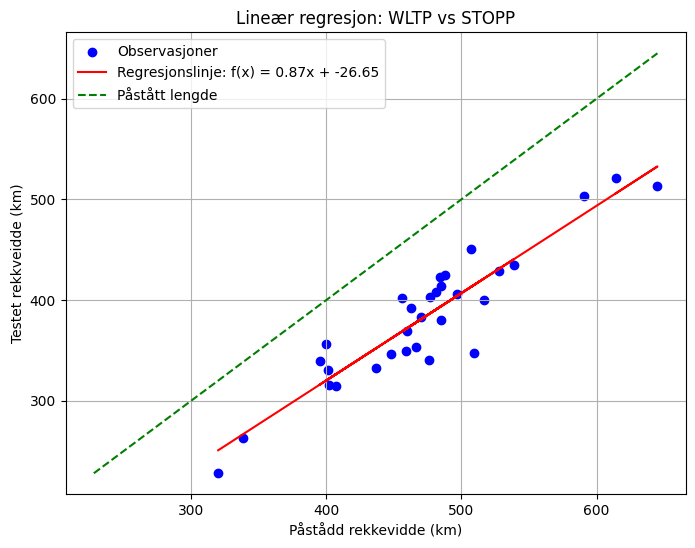

In [31]:
# Plot uten origo
plt.figure(figsize=(8,6))


plt.scatter(df_clean['WLTP_km'], df_clean['STOPP (km)'], label="Observasjoner", color='blue')

# Regresjonslinje
plt.plot(df_clean['WLTP_km'], df_clean['Predicted_STOPP_km'],
         label=f"Regresjonslinje: f(x) = {a:.2f}x + {b:.2f}", color='red')

# Linje som viser den påstått lengde
min_val = min(df_clean['WLTP_km'].min(), df_clean['STOPP (km)'].min())
max_val = max(df_clean['WLTP_km'].max(), df_clean['STOPP (km)'].max())
plt.plot([min_val, max_val], [min_val, max_val], label="Påstått lengde", color='green', linestyle='--')


plt.xlabel("Påstådd rekkevidde (km)")
plt.ylabel("Testet rekkveidde (km)")
plt.title("Lineær regresjon: WLTP vs STOPP")
plt.legend()
plt.grid(True)
plt.show()



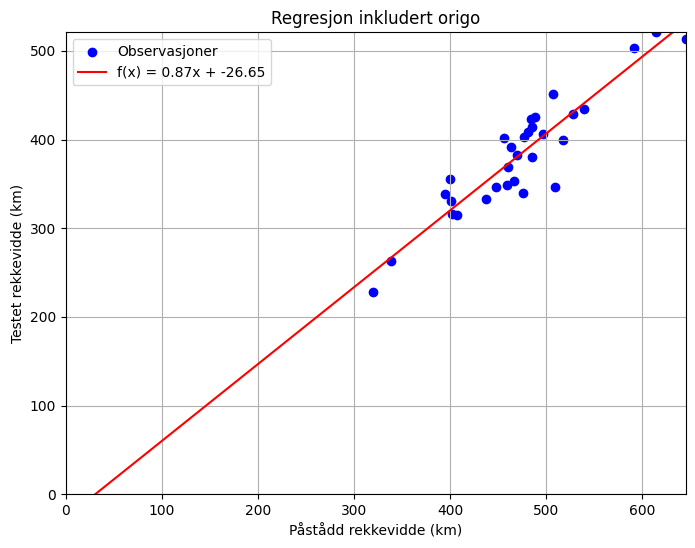

In [32]:
# Plot inkludert origo
plt.figure(figsize=(8,6))
plt.scatter(df_clean['WLTP_km'], df_clean['STOPP (km)'], label="Observasjoner", color='blue')

#Bruker linscape for å få med 0
x_vals = np.linspace(0, df_clean['WLTP_km'].max(), 100)
y_vals = a * x_vals + b
plt.plot(x_vals, y_vals, label=f"f(x) = {a:.2f}x + {b:.2f}", color='red')

plt.xlabel("Påstådd rekkevidde (km)")
plt.ylabel("Testet rekkevidde (km)")
plt.title("Regresjon inkludert origo")
plt.xlim(0, df_clean['WLTP_km'].max())
plt.ylim(0, df_clean['STOPP (km)'].max())
plt.legend()
plt.grid(True)
plt.show()


In [33]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             STOPP (km)   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.854
Method:                 Least Squares   F-statistic:                     175.9
Date:                Fri, 21 Mar 2025   Prob (F-statistic):           7.66e-14
Time:                        13:38:48   Log-Likelihood:                -142.80
No. Observations:                  31   AIC:                             289.6
Df Residuals:                      29   BIC:                             292.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.6450     31.210     -0.854      0.4